In [2]:
%reset -f

import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Class for applying multiple data transformation jobs
from sklearn.compose import ColumnTransformer as ct
# Scale numeric data
from sklearn.preprocessing import StandardScaler as ss
#  One hot encode data--Convert to dummy
from sklearn.preprocessing import OneHotEncoder as ohe
#  For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
# For modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
# For generating dataset
from sklearn.datasets import make_hastie_10_2

# For performance measures
from sklearn.metrics import accuracy_score
# From sklearn.metrics import
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# For data splitting
from sklearn.model_selection import train_test_split

In [6]:
import os

In [ ]:
#os.chdir("C:\Imp_Docs\Machine Learning\Exercises\Exercise - 4")

In [7]:
df = pd.read_csv("../input/data.csv")

In [8]:
df.shape

(569, 33)

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


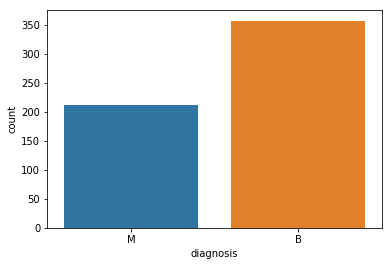

In [13]:
# Plotting the Countplot graph

sns.countplot(x='diagnosis',data=df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


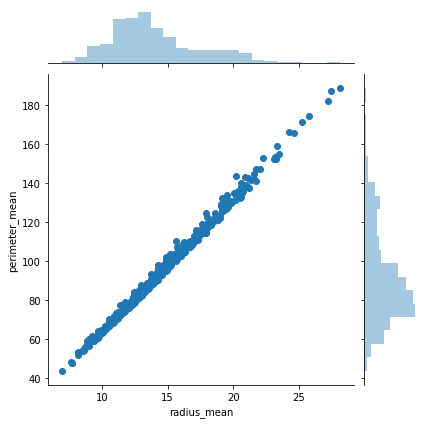

In [14]:
# Plotting the Jointplot graph

sns.jointplot(x='radius_mean',y='perimeter_mean',data=df)

In [15]:
# Checking if there are any Null values
df.isnull().values.any()
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [16]:
# Dropping columns "ID" and "Unnamed: 32"
 
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [17]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
# Assigning values 1 and 0 to "M" and "B"

df.diagnosis[df.diagnosis == 'M'] = 1
df.diagnosis[df.diagnosis == 'B'] = 0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
print(df)

    diagnosis           ...             fractal_dimension_worst
0           1           ...                             0.11890
1           1           ...                             0.08902
2           1           ...                             0.08758
3           1           ...                             0.17300
4           1           ...                             0.07678
5           1           ...                             0.12440
6           1           ...                             0.08368
7           1           ...                             0.11510
8           1           ...                             0.10720
9           1           ...                             0.20750
10          1           ...                             0.08452
11          1           ...                             0.10480
12          1           ...                             0.10230
13          1           ...                             0.06287
14          1           ...             

In [20]:
y = df['diagnosis']
y=y.astype('int')

In [21]:
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

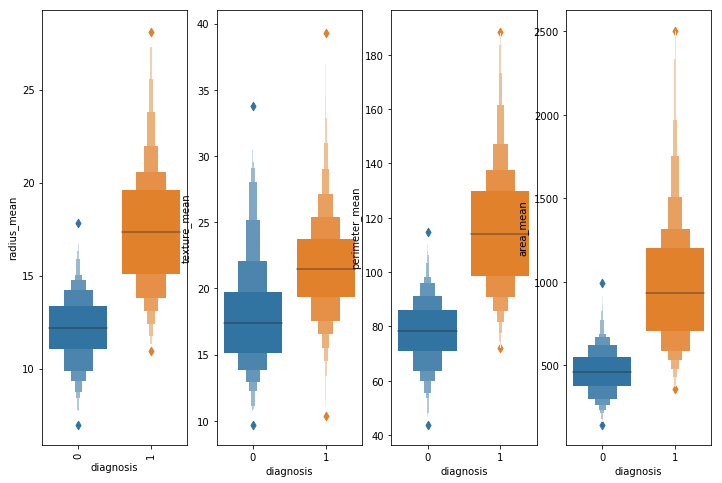

In [22]:
# Plotting the Boxplot Graph

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = 'Radius mean', rotation=90)

sns.boxenplot(x='diagnosis',y='radius_mean',data=df)
ax1 = fig.add_subplot(1,4,2)
sns.boxenplot(x='diagnosis',y='texture_mean',data=df)
ax1 = fig.add_subplot(1,4,3)
sns.boxenplot(x='diagnosis',y='perimeter_mean',data=df)
ax1 = fig.add_subplot(1,4,4)
sns.boxenplot(x='diagnosis',y='area_mean',data=df)

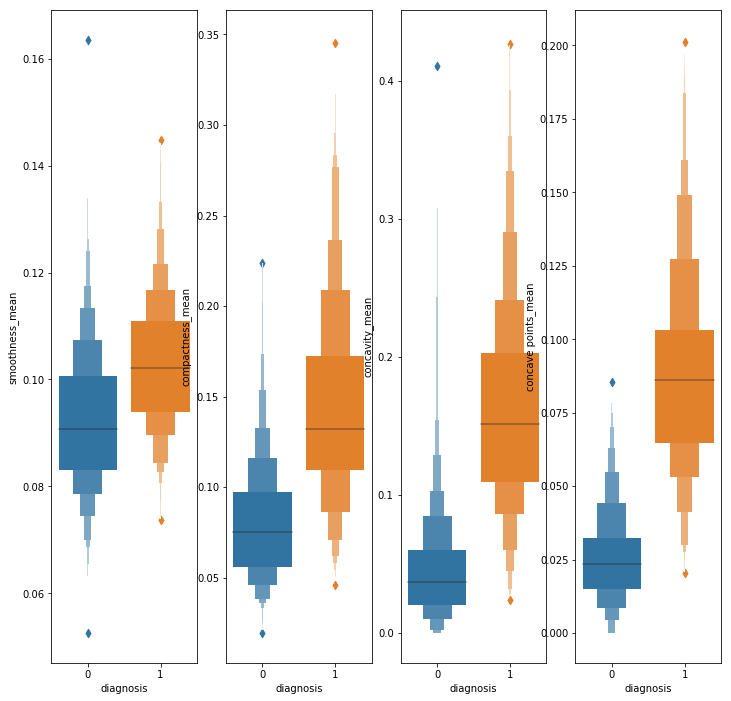

In [23]:
fig2 = plt.figure(figsize=(12,12))
ax2 = fig2.add_subplot(1,4,1)
sns.boxenplot(x='diagnosis',y='smoothness_mean',data=df)
ax2 = fig2.add_subplot(1,4,2)
sns.boxenplot(x='diagnosis',y='compactness_mean',data=df)
ax2 = fig2.add_subplot(1,4,3)
sns.boxenplot(x='diagnosis',y='concavity_mean',data=df)
ax2 = fig2.add_subplot(1,4,4)
sns.boxenplot(x='diagnosis',y='concave points_mean',data=df)

In [24]:
# Selecting the Columns 
X = df.loc[:, 'radius_mean' : 'fractal_dimension_worst']

In [25]:
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [26]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
X.shape

(569, 30)

In [28]:
# Scale the Numeric data

scaleit = ss()
s=scaleit.fit_transform(df.loc[:, 'radius_mean' : 'fractal_dimension_worst'])
s=scaleit.fit_transform(X)

In [29]:
pca = PCA()
principleComp = pca.fit_transform(X)

In [30]:
principleComp.shape

(569, 30)

In [31]:
pca.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

In [32]:
X = pca.explained_variance_ratio_.cumsum()

In [33]:
X

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


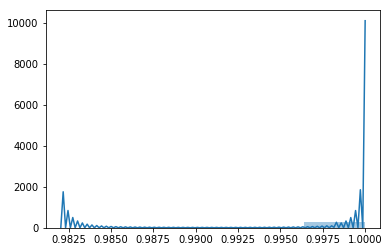

In [34]:
# Plotting the Distplot graph
sns.distplot(X,bins=5)

In [35]:
X = principleComp[:,0:11]

In [36]:
# Splitting and Shuffling the Data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    shuffle = True
                                                    )

In [37]:
X_train.shape

(455, 11)

In [38]:
X_test.shape

(114, 11)

In [39]:
y_train[:4]

193    1
316    0
497    0
481    0
Name: diagnosis, dtype: int64

In [40]:
X_test

array([[ 8.11390005e+02, -7.74173801e+01,  4.93296884e+01, ...,
         2.01681988e-01,  6.21608771e-02, -1.71178983e-02],
       [ 2.30421759e+03, -1.17535109e+02, -1.22356797e+00, ...,
         3.76388290e-01,  1.02382063e-01,  3.13111117e-02],
       [-4.36373547e+02,  2.57538378e+01,  8.64931632e+00, ...,
        -6.10324007e-02,  1.22566401e-01, -9.36331344e-02],
       ...,
       [ 6.52244528e+02,  1.85094041e+01,  1.23853492e+01, ...,
        -3.73318296e-01,  1.14844652e-01, -1.14899496e-01],
       [ 1.98250721e+02, -8.75101414e+01, -1.07575231e+01, ...,
         2.20893217e-02, -3.25074045e-02,  3.78444722e-02],
       [-5.50815536e+02, -2.73989111e+01,  1.79447405e+01, ...,
         8.73391418e-03, -5.71914691e-01,  2.86677806e-02]])

In [41]:
y_train

193    1
316    0
497    0
481    0
525    0
10     1
535    1
543    0
177    1
398    0
506    0
52     0
169    0
148    0
428    0
413    0
139    0
188    0
522    0
141    1
252    1
548    0
444    1
91     1
304    0
421    0
132    1
88     0
447    0
479    1
      ..
285    0
130    0
490    0
392    1
410    0
144    0
22     1
442    0
118    1
156    1
26     1
120    0
446    1
503    1
75     1
452    0
461    1
549    0
390    0
517    1
365    1
462    0
487    1
124    0
227    0
317    1
90     0
391    0
393    1
531    0
Name: diagnosis, Length: 455, dtype: int64

In [42]:
y_test

77     1
339    1
96     0
453    0
202    1
478    0
372    1
181    1
154    0
509    1
288    0
14     1
323    1
474    0
67     0
493    0
107    0
489    1
495    0
68     0
245    0
386    0
423    0
502    0
376    0
217    0
499    1
325    0
49     0
290    0
      ..
175    0
408    1
440    0
155    0
450    0
225    0
306    0
523    0
289    0
534    0
397    0
167    1
6      1
185    0
161    1
70     1
332    0
223    1
437    0
471    0
258    1
349    0
347    0
209    0
5      1
329    1
272    1
492    1
117    1
266    0
Name: diagnosis, Length: 114, dtype: int64

In [43]:
# Instantiate the Classifiers
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=5)
et = ExtraTreesClassifier(n_estimators=10)
xgb = XGBClassifier(learning_rate=0.5,
                   reg_alpha= 5,
                   reg_lambda= 0.1)
gbm = GradientBoostingClassifier()
kn = KNeighborsClassifier(n_neighbors=10)

In [44]:
# Train the data
dt1 = dt.fit(X_train,y_train)
rf1 = rf.fit(X_train,y_train)
et1 = et.fit(X_train,y_train)
xgb1 = xgb.fit(X_train,y_train)
gbm1 = gbm.fit(X_train,y_train)
kn1 = kn.fit(X_train,y_train)

In [45]:
# Data Predictions
y_pred_dt = dt1.predict(X_test)
y_pred_rf = rf1.predict(X_test)
y_pred_et = et1.predict(X_test)
y_pred_xgb= xgb1.predict(X_test)
y_pred_gbm = gbm1.predict(X_test)
y_pred_kn = kn1.predict(X_test)

Get probability values

In [46]:
y_pred_dt_prob = dt1.predict_proba(X_test)

In [47]:
y_pred_rf_prob = rf1.predict_proba(X_test)
y_pred_et_prob = et1.predict_proba(X_test)
y_pred_xgb_prob = xgb1.predict_proba(X_test)
y_pred_gbm_prob= gbm1.predict_proba(X_test)
y_pred_kn_prob = kn1.predict_proba(X_test)

In [48]:
y_pred_dt_prob

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [49]:
y_pred_rf_prob

array([[0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.2,

In [50]:
y_pred_et_prob

array([[0. , 1. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.3, 0.7],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.7, 0.3],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.1, 0.9],
       [1. , 0. ],
       [0.1, 0.9],
       [0.1, 0.9],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.3, 0.7],
       [0.8, 0.2],
       [1. , 0. ],
       [0.9, 0.1],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.7,

In [51]:
y_pred_xgb_prob

array([[0.04321712, 0.9567829 ],
       [0.04298019, 0.9570198 ],
       [0.9906145 , 0.0093855 ],
       [0.96175265, 0.03824732],
       [0.05396038, 0.9460396 ],
       [0.9906145 , 0.0093855 ],
       [0.07309675, 0.92690325],
       [0.0245834 , 0.9754166 ],
       [0.98819345, 0.01180655],
       [0.05614889, 0.9438511 ],
       [0.9883411 , 0.01165888],
       [0.7173259 , 0.2826741 ],
       [0.03146058, 0.9685394 ],
       [0.9819747 , 0.01802526],
       [0.98768234, 0.01231766],
       [0.9906145 , 0.0093855 ],
       [0.98768234, 0.01231766],
       [0.07433784, 0.92566216],
       [0.93343556, 0.06656445],
       [0.9378228 , 0.06217717],
       [0.9829943 , 0.01700567],
       [0.9883411 , 0.01165888],
       [0.9337973 , 0.06620272],
       [0.9906145 , 0.0093855 ],
       [0.9793056 , 0.02069439],
       [0.9873813 , 0.01261873],
       [0.04343611, 0.9565639 ],
       [0.9906145 , 0.0093855 ],
       [0.9594367 , 0.04056327],
       [0.4603833 , 0.5396167 ],
       [0.

In [52]:
y_pred_gbm_prob

array([[1.18122195e-03, 9.98818778e-01],
       [5.56743793e-03, 9.94432562e-01],
       [9.98583818e-01, 1.41618207e-03],
       [9.98028456e-01, 1.97154387e-03],
       [6.08422945e-03, 9.93915771e-01],
       [9.98714489e-01, 1.28551131e-03],
       [1.15980624e-02, 9.88401938e-01],
       [1.41971718e-03, 9.98580283e-01],
       [9.98150423e-01, 1.84957729e-03],
       [3.98940987e-03, 9.96010590e-01],
       [9.97854470e-01, 2.14553010e-03],
       [2.59954815e-01, 7.40045185e-01],
       [2.47837259e-03, 9.97521627e-01],
       [9.98179854e-01, 1.82014632e-03],
       [9.98228647e-01, 1.77135343e-03],
       [9.98583818e-01, 1.41618207e-03],
       [9.97448980e-01, 2.55101999e-03],
       [7.69382436e-03, 9.92306176e-01],
       [9.81983435e-01, 1.80165650e-02],
       [9.83971699e-01, 1.60283006e-02],
       [9.96681310e-01, 3.31869048e-03],
       [9.97798672e-01, 2.20132848e-03],
       [9.91239131e-01, 8.76086905e-03],
       [9.98444247e-01, 1.55575349e-03],
       [9.903913

In [53]:
y_pred_kn_prob

array([[0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.3,

In [54]:
# Calculate accuracy
accuracy_score(y_test,y_pred_dt)

0.9649122807017544

In [55]:
accuracy_score(y_test,y_pred_rf)

0.9473684210526315

In [56]:
accuracy_score(y_test,y_pred_et)

0.956140350877193

In [57]:
accuracy_score(y_test,y_pred_xgb)

0.9210526315789473

In [58]:
accuracy_score(y_test,y_pred_gbm)

0.9473684210526315

In [59]:
accuracy_score(y_test,y_pred_kn)

0.9210526315789473

In [60]:
# Draw Confusion matrix

confusion_matrix(y_test,y_pred_dt)

array([[62,  3],
       [ 1, 48]])

In [61]:
confusion_matrix(y_test,y_pred_rf)

array([[63,  2],
       [ 4, 45]])

In [62]:
confusion_matrix(y_test,y_pred_et)

array([[64,  1],
       [ 4, 45]])

In [63]:
confusion_matrix(y_test,y_pred_xgb)

array([[63,  2],
       [ 7, 42]])

In [64]:
confusion_matrix(y_test,y_pred_gbm)

array([[63,  2],
       [ 4, 45]])

In [65]:
confusion_matrix(y_test,y_pred_kn)

array([[62,  3],
       [ 6, 43]])

In [66]:
tn,fp,fn,tp= confusion_matrix(y_test,y_pred_dt).flatten()

In [67]:
# ROC graph
fpr_dt, tpr_dt, thresholds = roc_curve(y_test,
                                 y_pred_dt_prob[: , 1],
                                 pos_label= 1
                                 )

In [68]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob[: , 1],
                                 pos_label= 1
                                 )

In [69]:
fpr_et, tpr_et, thresholds = roc_curve(y_test,
                                 y_pred_et_prob[: , 1],
                                 pos_label= 1
                                 )

In [70]:
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test,
                                 y_pred_xgb_prob[: , 1],
                                 pos_label= 1
                                 )

In [71]:
fpr_gbm, tpr_gbm,thresholds = roc_curve(y_test,
                                 y_pred_gbm_prob[: , 1],
                                 pos_label= 1
                                 )

In [72]:
fpr_kn, tpr_kn, thresholds = roc_curve(y_test,
                                 y_pred_kn_prob[: , 1],
                                 pos_label= 1
                                 )

In [73]:
fpr_dt

array([0.        , 0.04615385, 1.        ])

In [74]:
tpr_dt

array([0.        , 0.97959184, 1.        ])

In [75]:
fpr_rf

array([0.        , 0.        , 0.03076923, 0.03076923, 0.09230769,
       0.21538462, 1.        ])

In [76]:
tpr_rf

array([0.        , 0.63265306, 0.83673469, 0.91836735, 0.91836735,
       1.        , 1.        ])

In [77]:
fpr_et

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01538462, 0.03076923, 0.04615385, 0.07692308, 0.18461538,
       0.35384615, 1.        ])

In [78]:
tpr_et

array([0.        , 0.28571429, 0.55102041, 0.71428571, 0.81632653,
       0.91836735, 0.93877551, 0.93877551, 0.97959184, 1.        ,
       1.        , 1.        ])

In [79]:
fpr_xgb

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01538462,
       0.01538462, 0.04615385, 0.04615385, 0.06153846, 0.06153846,
       0.07692308, 0.07692308, 0.09230769, 0.09230769, 0.21538462,
       0.26153846, 0.27692308, 0.30769231, 0.44615385, 0.47692308,
       0.55384615, 0.6       , 0.61538462, 0.64615385, 0.66153846,
       0.69230769, 0.70769231, 0.83076923, 0.84615385, 1.        ])

In [80]:
tpr_xgb

array([0.        , 0.02040816, 0.08163265, 0.10204082, 0.14285714,
       0.2244898 , 0.28571429, 0.3877551 , 0.44897959, 0.57142857,
       0.6122449 , 0.69387755, 0.73469388, 0.83673469, 0.83673469,
       0.85714286, 0.85714286, 0.89795918, 0.89795918, 0.93877551,
       0.93877551, 0.97959184, 0.97959184, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [81]:
fpr_gbm

array([0.        , 0.        , 0.        , 0.01538462, 0.01538462,
       0.03076923, 0.03076923, 0.04615385, 0.04615385, 0.52307692,
       0.55384615, 0.6       , 0.63076923, 0.86153846, 0.95384615,
       1.        ])

In [82]:
tpr_gbm

array([0.        , 0.02040816, 0.89795918, 0.89795918, 0.91836735,
       0.91836735, 0.93877551, 0.93877551, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [83]:
fpr_kn

array([0.        , 0.        , 0.        , 0.03076923, 0.03076923,
       0.04615385, 0.04615385, 0.06153846, 0.10769231, 0.16923077,
       1.        ])

In [84]:
tpr_kn

array([0.        , 0.71428571, 0.7755102 , 0.81632653, 0.83673469,
       0.87755102, 0.89795918, 0.91836735, 0.93877551, 0.95918367,
       1.        ])

In [85]:
# Get AUC values

auc(fpr_dt,tpr_dt)

0.9667189952904238

In [86]:
auc(fpr_rf,tpr_rf)

0.981789638932496

In [87]:
auc(fpr_et,tpr_et)

0.993563579277865

In [88]:
auc(fpr_gbm,tpr_gbm)

0.9962323390894819

In [89]:
auc(fpr_xgb,tpr_xgb)

0.9902668759811617

In [90]:
auc(fpr_kn,tpr_kn)

0.9667189952904237

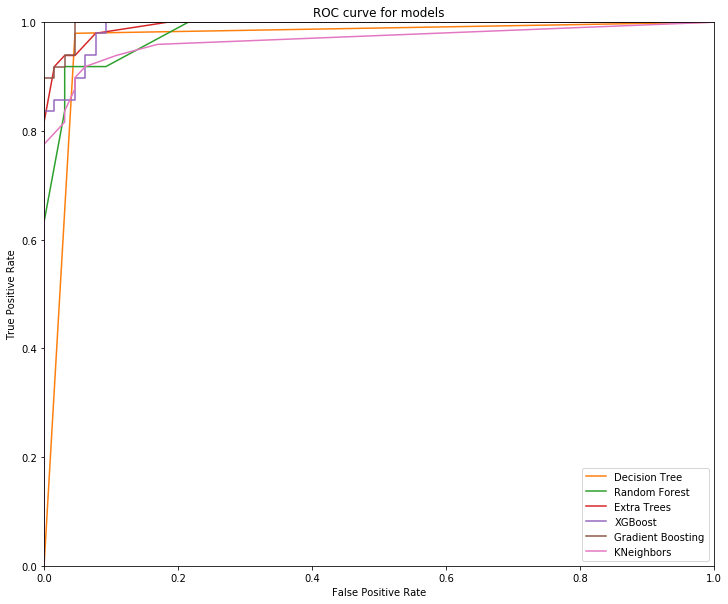

In [91]:
# Plot the ROC curve

fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes

# Also connect diagonals
ax.plot([0, 0], [1, 1], ls="--")   # Dashed diagonal line
# 9.3 Labels etc
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')
# 9.4 Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

ax.plot(fpr_dt, tpr_dt, label = "Decision Tree")
ax.plot(fpr_rf, tpr_rf, label = "Random Forest")
ax.plot(fpr_et, tpr_et, label = "Extra Trees")
ax.plot(fpr_xgb, tpr_xgb, label = "XGBoost")
ax.plot(fpr_gbm, tpr_gbm, label = "Gradient Boosting")
ax.plot(fpr_kn, tpr_kn, label = "KNeighbors")

# 9.6 Set legend and show plot
ax.legend(loc="lower right")
plt.show()

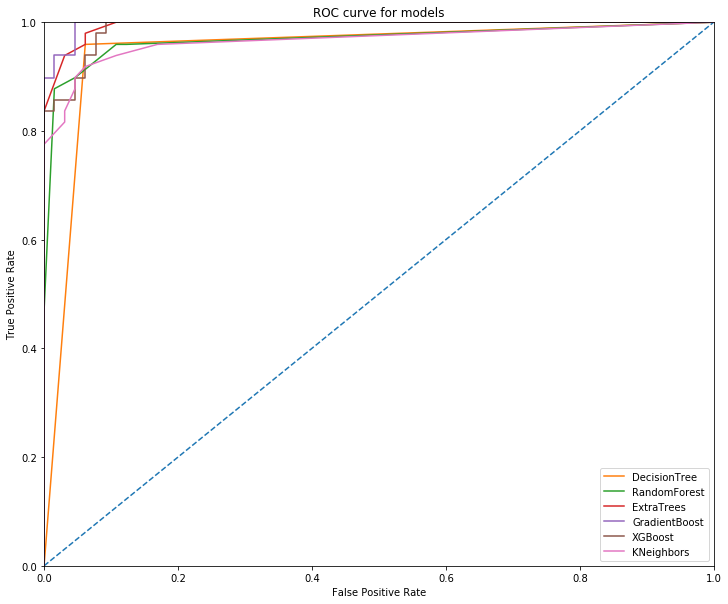

In [92]:
# For AUC Graph

models = [(dt, "DecisionTree"), (rf, "RandomForest"), (et, "ExtraTrees"), (gbm, "GradientBoost"),(xgb,"XGBoost"), (kn, "KNeighbors")]
#  Plot the ROC curve
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
# Also connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line
#  Labels etc
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
AUC = []
for clf,name in models:
    clf.fit(X_train,y_train)
    y_pred_prob = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test,
                                     y_pred_prob[: , 1],
                                     pos_label= 1
                                     )
    AUC.append((auc(fpr,tpr)))
    ax.plot(fpr, tpr, label = name)           # Plot on the axes

ax.legend(loc="lower right")
plt.show()